In [5]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [21]:
url="https://www.equitypandit.com/historical-data/HDFCBANK"
r=requests.get(url)
print(r)


<Response [200]>


In [22]:
soup=BeautifulSoup(r.text,'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Title -->
<title> HDFC Bank  Historical Data, HDFCBANK, Live NSE/BSE, Stock Price Today, and Target, Latest News and Analysis </title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="HDFC Bank  Historical Data, Stock Analysis, Buy/Sell Signal, Targets, Charts, Latest News, Technical Analysis, Fundamental Analysis, Live NSE/BSE Updates, Financial data and Ratios. " name="description">
<meta content="Equitypandit Financial Services Pvt. Ltd." name="Author"/>
<!-- Favicon -->
<link href="https://d2b0ersbqt56nw.cloudfront.net/wp-content/themes/equitypandit/images/favicon.png" rel="shortcut icon"/>
<!-- Icons css -->
<!--<link href="../tassets/css/icons.css" rel="stylesheet">-->
<link crossorigin="anonymous" href="https://use.fontawesome.com/releases/v5.8.1/css/all.css" integrity="sha384-50oBUHEmvpQ+1lW4y57PTFmhC

In [23]:
table=soup.find("table",class_="table table-hover mb-0 text-md-nowrap table-responsive pt-1")

In [24]:
title=table.find_all('th')[2:]
title

[<th>Date</th>,
 <th>Price</th>,
 <th>Open</th>,
 <th>High</th>,
 <th>Low</th>,
 <th>Volume</th>,
 <th>Change(%)</th>]

In [25]:
header=[]
for i in title:
  name=i.text
  header.append(name)
print(header)

['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change(%)']


In [26]:
df=pd.DataFrame(columns=header)
df

,Date,Price,Open,High,Low,Volume,Change(%)


In [27]:
rows=table.find_all('tr')[2:2000]
for i in rows[2:2000]:
    data=i.find_all("td")
    row=[tr.text for tr in data]
    #print(row)
    l=len(df)
    df.loc[l] = row

In [28]:
df.shape

(1237, 7)

In [37]:
df=df[::-1].reset_index()

In [40]:
df.drop(['index'],axis=1,inplace=True)


In [41]:
df

,Date,Price,Open,High,Low,Volume,Change(%)
0,21 Jun 2019,1207.10,1213.00,1214.85,1202.83,3312565,-0.50%
1,24 Jun 2019,1208.98,1205.98,1215.30,1205.00,1728750,0.16%
2,25 Jun 2019,1214.35,1209.93,1220.75,1201.50,2224950,0.44%
3,26 Jun 2019,1233.95,1212.35,1235.00,1211.00,2633409,1.61%
4,27 Jun 2019,1231.15,1234.38,1247.25,1228.08,4969809,-0.23%
...,...,...,...,...,...,...,...
1232,10 Jun 2024,1561.30,1574.00,1580.65,1557.60,11227029,-0.77%
1233,11 Jun 2024,1564.80,1556.00,1571.00,1552.20,14772663,0.22%
1234,12 Jun 2024,1574.15,1575.00,1588.30,1566.40,19640218,0.60%
1235,13 Jun 2024,1580.75,1581.75,1585.70,1574.00,12060096,0.42%


In [42]:
df.to_csv('HDFC data.csv')

# Load the CSV file

In [66]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'HDFC data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,Date,Price,Open,High,Low,Volume,Change(%)
0,0,21 Jun 2019,1207.10,1213.00,1214.85,1202.83,3312565,-0.50%
1,1,24 Jun 2019,1208.98,1205.98,1215.30,1205.00,1728750,0.16%
2,2,25 Jun 2019,1214.35,1209.93,1220.75,1201.50,2224950,0.44%
3,3,26 Jun 2019,1233.95,1212.35,1235.00,1211.00,2633409,1.61%
4,4,27 Jun 2019,1231.15,1234.38,1247.25,1228.08,4969809,-0.23%


# Create visualizations

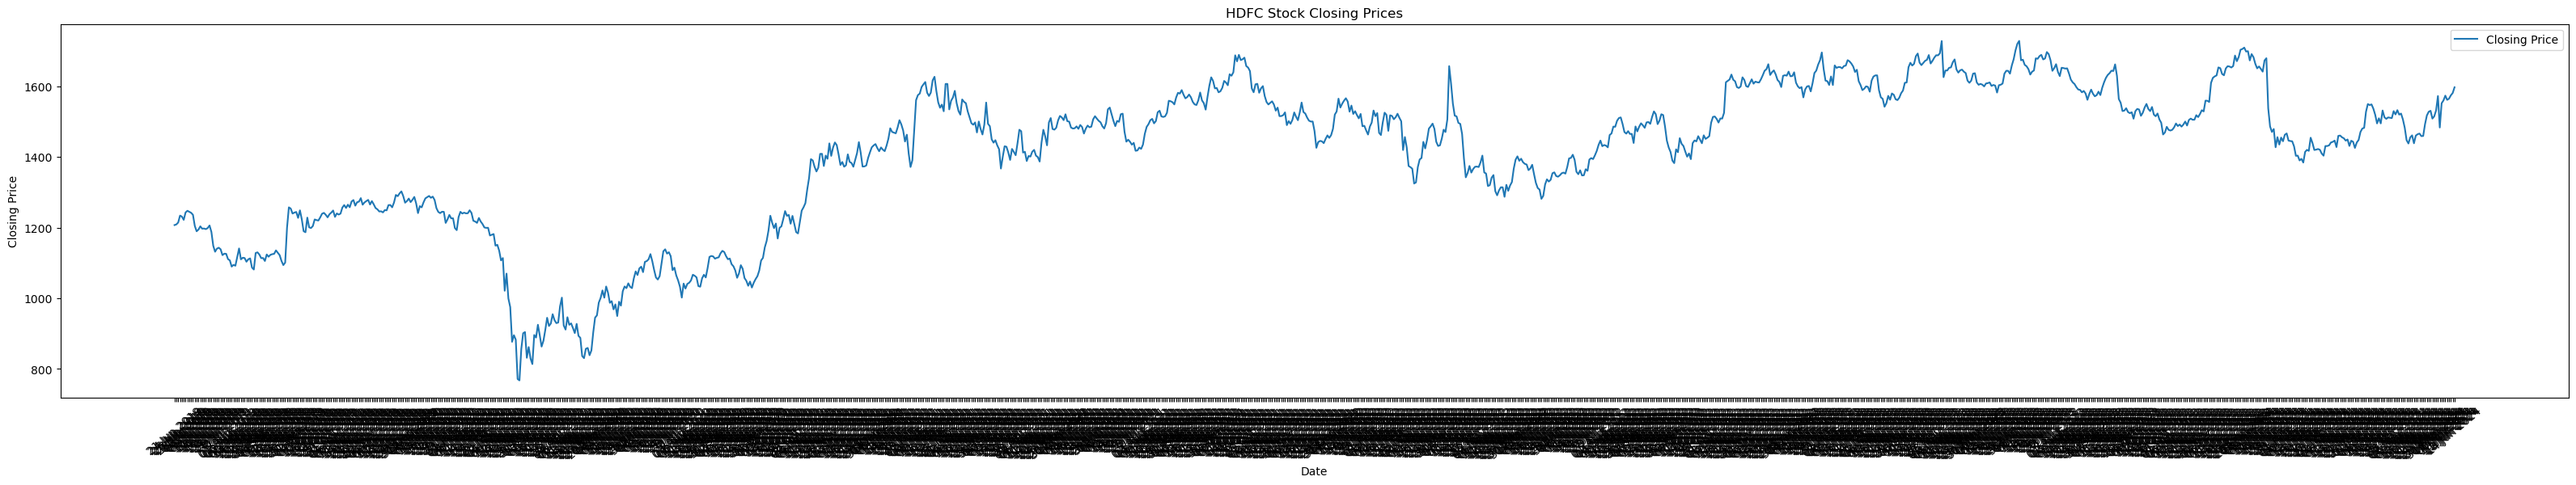

In [50]:
import matplotlib.pyplot as plt

# Plotting the closing prices
plt.figure(figsize=(40, 6))
plt.plot(df['Date'], df['Price'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('HDFC Stock Closing Prices')
plt.xticks(rotation=40)
plt.legend()
plt.show()

# Moving average plot

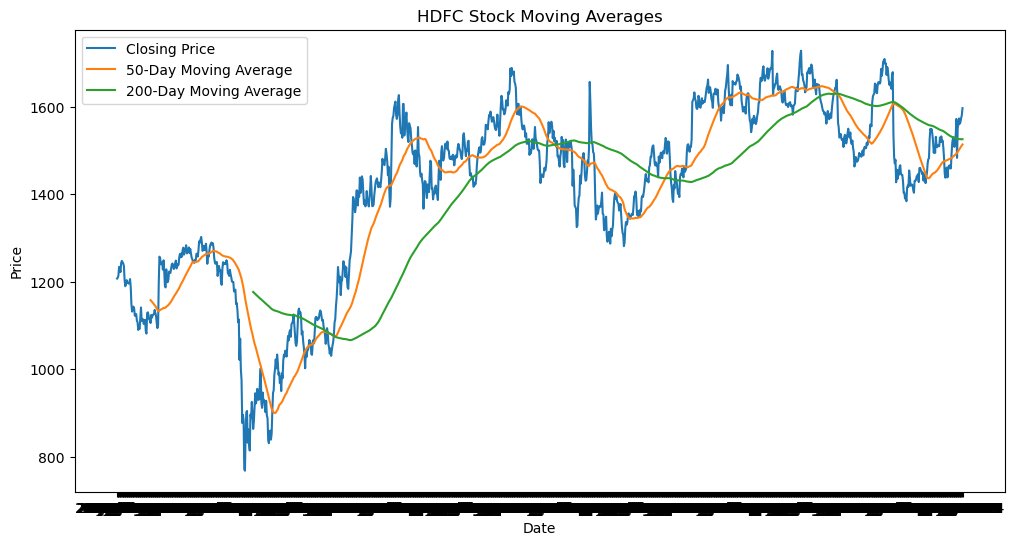

In [51]:
# Calculate moving averages
df['MA50'] = df['Price'].rolling(window=50).mean()
df['MA200'] = df['Price'].rolling(window=200).mean()

# Plotting the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Closing Price')
plt.plot(df['Date'], df['MA50'], label='50-Day Moving Average')
plt.plot(df['Date'], df['MA200'], label='200-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('HDFC Stock Moving Averages')
plt.legend()
plt.show()

In [53]:
! pip install mplfinance

     --------------------------------------- 75.0/75.0 kB 50.6 kB/s eta 0:00:00


In [67]:
df.rename(columns={"Price":'Close'},inplace=True)

<Figure size 1200x600 with 0 Axes>

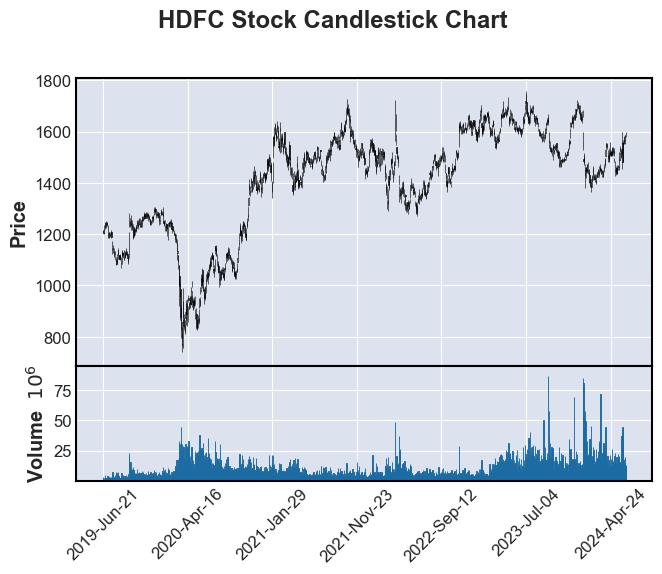

In [68]:
import mplfinance as mpf

# Converting the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
plt.figure(figsize=(12,6))
# Plotting the candlestick chart
mpf.plot(df, type='candle', volume=True, title='HDFC Stock Candlestick Chart')
plt.show()